In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parser 
import reverser

In [2]:
#cuts = [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]
cuts = np.logspace(-1, -10, num=37)
cuts_naming_bool = False
# print(cuts)
no_of_particles, total_scores = parser.cutting_routine(cuts, dir_name="cuts_finer", cut_name=cuts_naming_bool)
reverser.reverser_routine(cuts, dir_name="cuts_finer", cut_name=cuts_naming_bool)

No. of important particles (importance > 0.1): 5
Total importance score for important particles: 1.625423052
Data successfully written to cuts_finer/decays_PDG2016Plus_massorder_1.dat
No. of important particles (importance > 0.05623413251903491): 5
Total importance score for important particles: 1.625423052
Data successfully written to cuts_finer/decays_PDG2016Plus_massorder_2.dat
No. of important particles (importance > 0.03162277660168379): 7
Total importance score for important particles: 1.723759355
Data successfully written to cuts_finer/decays_PDG2016Plus_massorder_3.dat
No. of important particles (importance > 0.01778279410038923): 8
Total importance score for important particles: 1.743033698
Data successfully written to cuts_finer/decays_PDG2016Plus_massorder_4.dat
No. of important particles (importance > 0.01): 10
Total importance score for important particles: 1.772799747
Data successfully written to cuts_finer/decays_PDG2016Plus_massorder_5.dat
No. of important particles (im

In [ ]:
plt.plot(cuts, total_scores)

In [3]:
# Path to your file
file_path = "decays_PDG2016Plus_massorder_original.dat"
# file_path = "decays_QM2016Plus_massorder.dat"

# Parse the file
particles_df, decays_df = parser.parse_to_df(file_path)

stable_particles_test = particles_df[particles_df["Width (GeV)"] == 0.0]
stable_particles = stable_particles_test[stable_particles_test["No. of decay channels"] == 1]["ID"].tolist()
print(f"Number of stable particles: {len(stable_particles)}")
print(f"Stable particles IDs: {stable_particles}")

Number of stable particles: 26
Stable particles IDs: [3334, -3334, 3312, -3312, 3322, -3322, 3112, -3112, 3212, -3212, 3222, -3222, 3122, -3122, 2112, -2112, 2212, -2212, 311, -311, 321, -321, 211, -211, 111, 22]


In [4]:
# View the data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option("display.max_colwidth", None)  # Set max column width

print("Particles DataFrame:")
print(particles_df.head(n=3))
print()
print(f"total number of particles : {len(particles_df)}")

print("\nDecays DataFrame:")
print(decays_df.head(n=3))
print()
print(f"total number of decays : {len(decays_df)}")


Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3

total number of particles : 739

Decays DataFrame:
   ParentID  No. of daughter particles  BranchingRatio              ProductIDs
0   2001034                          2            0.96  [2001030, 22, 0, 0, 0]
1   2001034                          2            0.04   [2112, -211, 0, 0, 0]
2   2001033                          2            0.96  [2001029, 22, 0, 0

In [5]:
# Example usage of the branchratio_of_particle_to_pions function
test_id = 331  # Example particle ID (eta prime)
decay_chain_to_pion, branching_ratio_to_pion = parser.branchratio_of_particle_to_pions(test_id, particles_df, decays_df)

combined = list(zip(decay_chain_to_pion, branching_ratio_to_pion))
combined.sort(key=lambda x: x[1], reverse=True)  # Sort by branching ratio in descending order
for decay_path, br in combined:
    print(f"Decay chain to pions for particle ID {test_id}:  Path: {decay_path}, Branching Ratio: {br:.9f}")   

total_br = sum(branching_ratio_to_pion)
print(f"Total branching ratio for particle ID {test_id} decaying into pions: {total_br:.9f}")
print(f"Number of decay paths to pions for particle ID {test_id}: {len(decay_chain_to_pion)}")

importance = parser.importance_score(test_id, particles_df, decays_df)
print(f"Importance score for particle ID {test_id}: {importance:.9f}")

Decay chain to pions for particle ID 331:  Path: 211, Branching Ratio: 0.453000000
Decay chain to pions for particle ID 331:  Path: 113_211, Branching Ratio: 0.302000000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.172140000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.081320000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.031710000
Decay chain to pions for particle ID 331:  Path: 223_211, Branching Ratio: 0.027772900
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.014980000
Decay chain to pions for particle ID 331:  Path: 223_211, Branching Ratio: 0.000527000
Total branching ratio for particle ID 331 decaying into pions: 1.083449900
Number of decay paths to pions for particle ID 331: 8
Importance score for particle ID 331: 0.001156096


2.0000000000000004


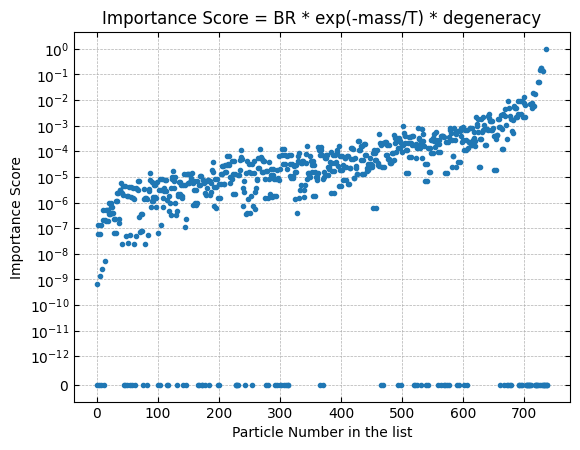

In [ ]:
importance_scores = []
for id in particles_df["ID"]:
    #print(id)
    importance = parser.importance_score(id, particles_df, decays_df)
    importance_scores.append(importance)

norm_importance_scores = parser.normalize_scores(importance_scores)
print(np.sum(norm_importance_scores))

plt.plot(norm_importance_scores, marker='.', linestyle='None')
plt.xlabel("Particle Number in the list")
plt.ylabel("Importance Score")
plt.title("Importance Score = BR * exp(-mass/T) * degeneracy")
plt.yscale('symlog', linthresh=1e-12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which="both", direction="in", top=True, right=True)
plt.show()
#plt.savefig("Plots/importance_score_all_particles.png", dpi = 300)

In [13]:
particles_df["Importance Score"] = norm_importance_scores

print("Particles DataFrame:")
print(particles_df.head(n=3))

Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Importance Score
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2      0.000000e+00
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3      6.649967e-10
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3      5.943051e-08


In [35]:
cut = 1e-01  # Threshold for importance score
important_particles = []
for _, particle in particles_df.iterrows():
    importance = particle["Importance Score"]
    particle_id = particle["ID"]
    if importance > cut:  # Threshold for importance
        important_particles.append(particle_id)

print(f"Important particles (importance > {cut}): {important_particles}")
print(f"Number of important particles: {len(important_particles)}")

total_score = 0
for id in important_particles:
    importance = particles_df.loc[particles_df["ID"] == id, "Importance Score"].values[0]
    total_score += importance
print(f"Total importance score for important particles: {total_score-1:.9f}")

all_important_particles = important_particles + stable_particles  # Keep a copy of all important particles
all_important_particles_unique = list(set(all_important_particles))  # Remove duplicates
print(f"All important particles (including stable particles): {all_important_particles_unique}")
print(f"Number of all important particles (including stable particles): {len(all_important_particles_unique)}")

Important particles (importance > 0.1): [223, 213, 113, 221, 211]
Number of important particles: 5
Total importance score for important particles: 0.625423052
All important particles (including stable particles): [3334, -3322, 3212, -3312, 3222, 22, 2212, 3112, -211, 3122, 311, -321, 2112, -2112, 321, -311, -3122, 211, 213, -3112, -2212, 221, -3334, 223, -3222, 111, 3312, 113, -3212, 3322]
Number of all important particles (including stable particles): 30


In [36]:
particles_df_cut, decays_df_cut = parser.delete_particle_list_helper(all_important_particles_unique, particles_df, decays_df)

print("Particles DataFrame:")
print(particles_df_cut.head(n=5))
print()
print(f"total number of particles : {len(particles_df_cut)}")

print("\nDecays DataFrame:")
print(decays_df_cut.head(n=5))
print()
print(f"total number of decays : {len(decays_df_cut)}")

Particles DataFrame:
     ID        Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Importance Score
0  3334       Omega     1.67245          0.0           4           1               -3          0           0      0.0      -1                      1               0.0
1 -3334  Anti-Omega     1.67245          0.0           4          -1                3          0           0      0.0       1                      1               0.0
2  3312        Ksi-     1.32131          0.0           2           1               -2          0           0      0.5      -1                      1               0.0
3 -3312   Anti-Ksi-     1.32131          0.0           2          -1                2          0           0      0.5       1                      1               0.0
4  3322        Ksi0     1.31483          0.0           2           1               -2          0           0      0.5       0                   

In [ ]:
# Output path
# output_path = f"cuts_test/decays_PDG2016Plus_massorder_{cut}.dat"

# parser.parse_to_dat(output_path, particles_df_cut, decays_df_cut)